# Interactive Datacube within Jupyter Notebooks

Currently a work in progress, there are two demos.
1. Switch between time slices of an image interactively
2. Click on a PQ image and have the flag values displayed in a table

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datacube
from datacube.storage.masking import mask_to_dict

from ipywidgets import interact
from IPython.display import display
import ipywidgets as widgets


In [5]:
dc = datacube.Datacube(app='damien-notebook')

In [7]:
lordhowe_ledaps = dc.load(product='ls8_ledaps_scene', 
              x=(159.02, 159.13), y=(-31.45, -31.64), 
              time=('2016-3-1', '2016-4-16'),
              #measurements=['sr_band2', 'sr_band3', 'sr_band4'],
              output_crs='EPSG:32657',resolution=(-30,30))

#lordhowe_pq = lordhowe_ledaps.cfmask

In [4]:
len(pq_autumn.time)
# pq_autumn.time

9

## Run the next two cells for a slider to flick between images

<IPython.core.display.Javascript object>


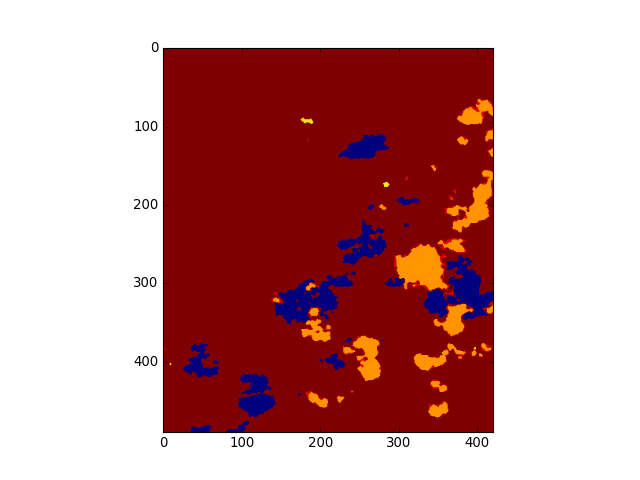

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(pq_autumn.isel(time=0))

# plt.grid(True)
# fig.canvas.mpl_connect('button_press_event', callback)

plt.show()

In [6]:

def show_image_slice(time_idx):
    ax.imshow(pq_autumn.isel(time=time_idx))
#     plt.draw()


interact(show_image_slice, time_idx=(0,8))



## Run this cell for interactive clicking to get destructured PQ

<IPython.core.display.Javascript object>


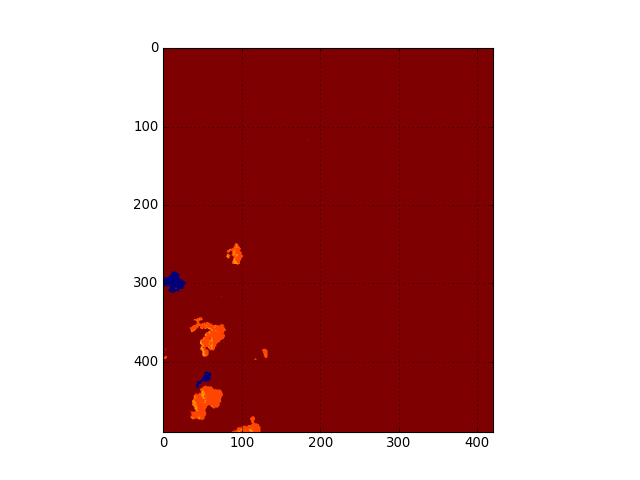

In [7]:
w = widgets.HTML("Event information appears here when you click on the figure")

def callback(event):
    x, y = int(event.xdata + 0.5), int(event.ydata + 0.5)
    
    value = int(pq_autumn.isel(time=2, x=x, y=y))
    
    sample = mask_to_dict(pq.pixelquality.flags_definition, value)
    df = pd.DataFrame.from_dict(sample, orient="index")
    w.value = bin(value) + '<br>' + df._repr_html_()


fig = plt.figure()
plt.imshow(pq_autumn.isel(time=2))
plt.grid(True)
fig.canvas.mpl_connect('button_press_event', callback)

plt.show()
display(w)